# Наша основная цель - выявить выбросы, отклонения в данных.
### Для чего это нужно? Что бы наша модель, которую мы построим по этим данным была корректная. Выбросы изменяют наши статистические параметры данных - среднюю и ср. кв. отклонение. К примеру, широко известная шутка по поводу средней ЗП. Если пишут что средняя ЗП состовляет по региону(1000 человек) 250т.р. то можно удивится откуда такие ЗП!) Но при этом не смотрят на отклонения в данных. А если внимательно посмотреть то окажется что 9990 людей получают 20т.р. а 10 людей по 5 млн.р Как раз таки эти 10 людей и вводят в заблуждение нас. Возможен и другой вариант: у человека была украдена карта, после этого пошли большие траты с нее. Банку это может выявить данное мошенечество. В связи с этим нужно смотреть и другие статистические параметры данных. Применительно к выше приведенному примеру можно посмотреть моду она и будет характеризовать данные

### План работы такой:
#### 1. После считывания посмотреть на типы данных (категориальные, численные, булевы...)
#### 2. Обработать отсутствущие данные 
#### 3. Работа с выбросами
#### 3.1. Преобразовать данные которые записаны как категориальные в численные 
#### 3.2 Обнаружить эти выбросы
#### 3.2.1. Статистические методы обнаружения
#### 3.2.2. Методы обнаружения с использованием алгоритов машинного обучения

# №1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('sfr_test.csv')
df.head()

,member_unique_id,gender,dob,eligible_year,eligible_month,affiliation_type,pbp_group,plan_name,npi,line_of_business,...,pcp_ffs,plan_premium,prof,reinsurance,risk_score_partd,rx,rx_rebates,rx_with_rebates,rx_without_rebates,spec_cap
0,1,F,21/06/1990,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,1,HMO,...,$0.00,"$3,507.00",$0.00,$7.92,$0.00,$0.00,$0.00,$0.00,$0.00,$843.78
1,2,M,02/01/1948,2020,202006,Affiliate,NON-SNP,NaN,1,HMO,...,$0.00,"$6,204.84",$0.00,$8.13,$0.00,"$11,289.69",$0.00,"$10,688.46","$10,859.82",$906.77
2,3,M,14/06/1948,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,1,HMO,...,$0.00,"$4,012.46",$0.00,$7.92,$0.00,$0.00,$0.00,$0.00,$0.00,$815.84
3,4,M,10/02/1954,2020,202006,Affiliate,D-SNP,MEDICARE - CARENEEDS,1,HMO,...,$0.00,"$9,770.61",$0.00,$8.30,$0.00,$73.88,$0.00,$62.87,$64.91,$846.26
4,5,M,31/12/1953,2020,202006,Affiliate,NON-SNP,NaN,1,HMO,...,$0.00,"$19,976.13","$8,875.80",$8.90,$0.00,$522.48,$0.00,$517.56,$606.01,$867.55


In [3]:
df.shape # смотрим сколько наборов данных и сколько фичей

(10530, 28)

In [4]:
df.dtypes # смотрим на типы данных

member_unique_id        int64
gender                 object
dob                    object
eligible_year           int64
eligible_month          int64
affiliation_type       object
pbp_group              object
plan_name              object
npi                     int64
line_of_business       object
esrd                     bool
hospice                  bool
ipa_funding            object
ma_premium             object
ma_risk_score          object
mbr_with_rx_rebates    object
partd_premium          object
pcp_cap                object
pcp_ffs                object
plan_premium           object
prof                   object
reinsurance            object
risk_score_partd       object
rx                     object
rx_rebates             object
rx_with_rebates        object
rx_without_rebates     object
spec_cap               object
dtype: object

In [5]:
# Видим что многие числовые фичи идут как категориальные
# их нужно преобразовать

# №2

In [6]:
df.isnull().sum() # смотрим пропуски в данных

member_unique_id          0
gender                    0
dob                       0
eligible_year             0
eligible_month            0
affiliation_type          0
pbp_group                 0
plan_name              3924
npi                       0
line_of_business          0
esrd                      0
hospice                   0
ipa_funding               0
ma_premium                0
ma_risk_score             0
mbr_with_rx_rebates       0
partd_premium             0
pcp_cap                   0
pcp_ffs                   0
plan_premium              0
prof                      0
reinsurance               0
risk_score_partd          0
rx                        0
rx_rebates                0
rx_with_rebates           0
rx_without_rebates        0
spec_cap                  0
dtype: int64

In [7]:
# пропуски только в одном признаке = plan_name
# посмотрим что там
df['plan_name'].value_counts()

MEDICARE - CAREFREE     4469
MEDICARE - CARENEEDS    2006
MEDICARE - CAREONE       131
Name: plan_name, dtype: int64

In [8]:
# данный признак не несет в себе числовой информации
# т.к. наша цель выявить выбросы, то в связи с тем что я не знаю смысловой нагрузки данного параметра - удалю его
df.drop(['plan_name'], axis= 1, inplace=True)
df.shape

(10530, 27)

# № 3

### № 3.1

In [9]:
# Преобразуем все числове признаки (финансовые), 
# которые содержат знак $ в числовой тип
# иначе убираем данный признак, в всвязи с тем что нужен анализ финансовых данных
member_id = df.member_unique_id # ID клиента будет удалено, поэтому копирую 
for col in df.columns:
    try:
        if ('$' in df.loc[0, col]):
            print(col)
            df[col] = df[col].str.replace('$', '').str.replace(',', '').astype(float)
        else:
            df.drop([col], axis = 1, inplace = True)
    except:
        df.drop([col], axis = 1, inplace = True)

ipa_funding
ma_premium
ma_risk_score
mbr_with_rx_rebates
partd_premium
pcp_cap
pcp_ffs
plan_premium
prof
reinsurance
risk_score_partd
rx
rx_rebates
rx_with_rebates
rx_without_rebates
spec_cap


In [10]:
df['member_unique_id'] = member_id # ID обратно вставляю

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10530 entries, 0 to 10529
Data columns (total 17 columns):
ipa_funding            10530 non-null float64
ma_premium             10530 non-null float64
ma_risk_score          10530 non-null float64
mbr_with_rx_rebates    10530 non-null float64
partd_premium          10530 non-null float64
pcp_cap                10530 non-null float64
pcp_ffs                10530 non-null float64
plan_premium           10530 non-null float64
prof                   10530 non-null float64
reinsurance            10530 non-null float64
risk_score_partd       10530 non-null float64
rx                     10530 non-null float64
rx_rebates             10530 non-null float64
rx_with_rebates        10530 non-null float64
rx_without_rebates     10530 non-null float64
spec_cap               10530 non-null float64
member_unique_id       10530 non-null int64
dtypes: float64(16), int64(1)
memory usage: 1.4 MB


In [12]:
# в оставшихся финансовых данных посмотрим сколько уникальных значений в каждой фиче
new_columns = [] # список фичей где кол-о уникальных значений будет более 10
for col in df.columns:
    num_element = df[col].nunique() # кол-о уникальных значений в признаке
    print('col = {}, number element = {}'.format(col, num_element))
    # если кол-о уникальных значений более 10
    if num_element > 10: 
        new_columns.append(col)

col = ipa_funding, number element = 10460
col = ma_premium, number element = 10435
col = ma_risk_score, number element = 3282
col = mbr_with_rx_rebates, number element = 9739
col = partd_premium, number element = 9293
col = pcp_cap, number element = 1168
col = pcp_ffs, number element = 379
col = plan_premium, number element = 10463
col = prof, number element = 1791
col = reinsurance, number element = 175
col = risk_score_partd, number element = 1
col = rx, number element = 6445
col = rx_rebates, number element = 1
col = rx_with_rebates, number element = 6442
col = rx_without_rebates, number element = 6471
col = spec_cap, number element = 6866
col = member_unique_id, number element = 10530


### Видим что 2 признака risk_score_partd &  rx_rebates имеют только по 1 уникальному значению. Посмотрим что там:

In [13]:
df['rx_rebates'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: rx_rebates, dtype: float64

In [14]:
df['risk_score_partd'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: risk_score_partd, dtype: float64

### Данные признаки не несут в себе никакой информации для анализа - удалим: 

In [15]:
df.drop(['risk_score_partd', 'rx_rebates'], axis = 1, inplace= True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10530 entries, 0 to 10529
Data columns (total 15 columns):
ipa_funding            10530 non-null float64
ma_premium             10530 non-null float64
ma_risk_score          10530 non-null float64
mbr_with_rx_rebates    10530 non-null float64
partd_premium          10530 non-null float64
pcp_cap                10530 non-null float64
pcp_ffs                10530 non-null float64
plan_premium           10530 non-null float64
prof                   10530 non-null float64
reinsurance            10530 non-null float64
rx                     10530 non-null float64
rx_with_rebates        10530 non-null float64
rx_without_rebates     10530 non-null float64
spec_cap               10530 non-null float64
member_unique_id       10530 non-null int64
dtypes: float64(14), int64(1)
memory usage: 1.2 MB


In [17]:
# неинформативные признаки
# будем искать так же признаки у которых в более 50% строк одно и тоже значение
for col in df.columns:
    count_val = df[col].value_counts()
    top_percent = (count_val / df.shape[0]).iloc[0]
    if top_percent > 0.5:
        print('col = {}, {:.1f}%'.format(col, top_percent*100))
        #print(count_val)

col = pcp_ffs, 96.0%
col = prof, 82.5%


### 2 признака  pcp_ffs и prof не несут особо  в себе информации. Взглянем на их гистограммы:

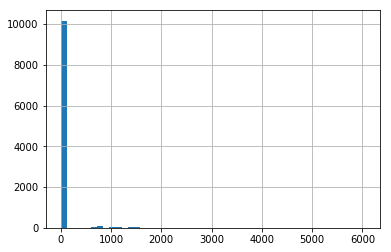

In [18]:
df.pcp_ffs.hist(bins = 50)

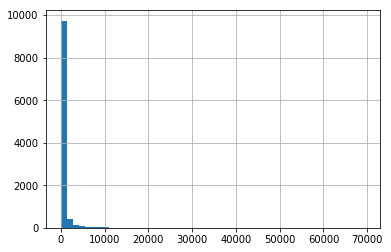

In [19]:
df.prof.hist(bins = 50)

### Так же удалим данные признаки: 

In [20]:
df.drop(['pcp_ffs', 'prof'], axis = 1 , inplace= True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10530 entries, 0 to 10529
Data columns (total 13 columns):
ipa_funding            10530 non-null float64
ma_premium             10530 non-null float64
ma_risk_score          10530 non-null float64
mbr_with_rx_rebates    10530 non-null float64
partd_premium          10530 non-null float64
pcp_cap                10530 non-null float64
plan_premium           10530 non-null float64
reinsurance            10530 non-null float64
rx                     10530 non-null float64
rx_with_rebates        10530 non-null float64
rx_without_rebates     10530 non-null float64
spec_cap               10530 non-null float64
member_unique_id       10530 non-null int64
dtypes: float64(12), int64(1)
memory usage: 1.0 MB


### Данные готовы для анализа на выбросы 

# 3.2 

### 3.2.1 

## 1й способ анализа: по стандартному отклонению. Обычно данные имеют приблизительно нормальное распределение - 68% значений в пределах 1го станд. отклонения, 95% в пределах - 2х стандартных отклонений и 99.7% в пределах 3х стандартных отклонений. Будем искать среди наших данных те точки которые превышают более чем в 3 раза станд. отклонение

In [22]:
df_columns = list(df.columns) # получаем список фичей
len(df_columns)

13

In [23]:
df_columns.pop() # удаляем ID
len(df_columns)

12

In [24]:
df_columns

['ipa_funding',
 'ma_premium',
 'ma_risk_score',
 'mbr_with_rx_rebates',
 'partd_premium',
 'pcp_cap',
 'plan_premium',
 'reinsurance',
 'rx',
 'rx_with_rebates',
 'rx_without_rebates',
 'spec_cap']

### Теперь напишим небольшую ф-ю которая на основании данных будет вычислять ст. отклонение, среднюю, верхние и нижние границы квартилей. Основываясь на этих данных для каждого экзмепляра данных по данному признаку будем делать метку в отдельном признаке: входит ли он в диапозон 3х станд. откл-й или нет.

In [25]:
# В функции вычисляем среднюю, станд. отклонение и границы в размере 3х станд-х отклонений
def find_outliers(data, columns):
    # цикл по всем признакам
    columns_outliers = [] # список имен призаков, которые определяют отклоения в вдие булевого значения
    for col in columns:
        # имя признака который определяет что по данному признаку данная точка имеет отклонение
        col_outliers = 'outliers_' + col         
        columns_outliers.append(col_outliers)
        print(columns_outliers)
        print('feature: {}'.format(col))        
        data_std = data[col].std() # станд отк
        data_mean = data[col].mean() # средняя
        print('\tstd = {:.2f} mean = {:.2f} '.format(data_std, data_mean))
        outliers_size = data_std * 3 # размах в 3 станд. откл

        lower_limit  = data_mean - outliers_size # нижняя границы
        upper_limit = data_mean + outliers_size # верхняя границы
        print('\tlow = {:.2f} upper = {:.2f} '.format(lower_limit, upper_limit))

        for i in range(data.shape[0]):            
            if data.loc[i, col] > upper_limit or data.loc[i, col]  < lower_limit:
                # если точка выходит за границы
                data.loc[i, col_outliers] = True
            else:
                # точка лежит в пределах допустимых границ
                data.loc[i, col_outliers] = False
    return data, columns_outliers

df, columns_outliers = find_outliers(df, df_columns)

['outliers_ipa_funding']
feature: ipa_funding
	std = 7690.19 mean = 10657.85 
	low = -12412.73 upper = 33728.42 
['outliers_ipa_funding', 'outliers_ma_premium']
feature: ma_premium
	std = 8955.58 mean = 12311.73 
	low = -14555.01 upper = 39178.46 
['outliers_ipa_funding', 'outliers_ma_premium', 'outliers_ma_risk_score']
feature: ma_risk_score
	std = 11.40 mean = 14.60 
	low = -19.59 upper = 48.80 
['outliers_ipa_funding', 'outliers_ma_premium', 'outliers_ma_risk_score', 'outliers_mbr_with_rx_rebates']
feature: mbr_with_rx_rebates
	std = 1130.53 mean = 500.43 
	low = -2891.18 upper = 3892.03 
['outliers_ipa_funding', 'outliers_ma_premium', 'outliers_ma_risk_score', 'outliers_mbr_with_rx_rebates', 'outliers_partd_premium']
feature: partd_premium
	std = 239.16 mean = 281.52 
	low = -435.94 upper = 998.99 
['outliers_ipa_funding', 'outliers_ma_premium', 'outliers_ma_risk_score', 'outliers_mbr_with_rx_rebates', 'outliers_partd_premium', 'outliers_pcp_cap']
feature: pcp_cap
	std = 269.44 mea

### Теперь можно посчитать по каждой фиче сколько точек выходят за границы (наша ф-я так же формировала доп столбик выход за границу даже для тех признаков которые не выходят за них, эти признаки нужно удалить): 

In [26]:
for col in columns_outliers:
    sum_outliers = df[col].sum()
    if sum_outliers > 0:
        feature = col.replace('outliers_', '')
        print('feature {} it has {} outliers'.format(feature, sum_outliers))
    else:
        columns_outliers.remove(col)

feature ipa_funding it has 169 outliers
feature ma_premium it has 170 outliers
feature ma_risk_score it has 187 outliers
feature mbr_with_rx_rebates it has 95 outliers
feature partd_premium it has 191 outliers
feature rx_with_rebates it has 87 outliers
feature rx_without_rebates it has 84 outliers
feature spec_cap it has 36 outliers


In [27]:
col_out = []
for col in columns_outliers:
    col_out.append(col.replace('outliers_', ''))
print(col_out)

['ipa_funding', 'ma_premium', 'ma_risk_score', 'mbr_with_rx_rebates', 'partd_premium', 'plan_premium', 'rx', 'rx_with_rebates', 'rx_without_rebates', 'spec_cap']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000012D2A860>,
      dtype=object)

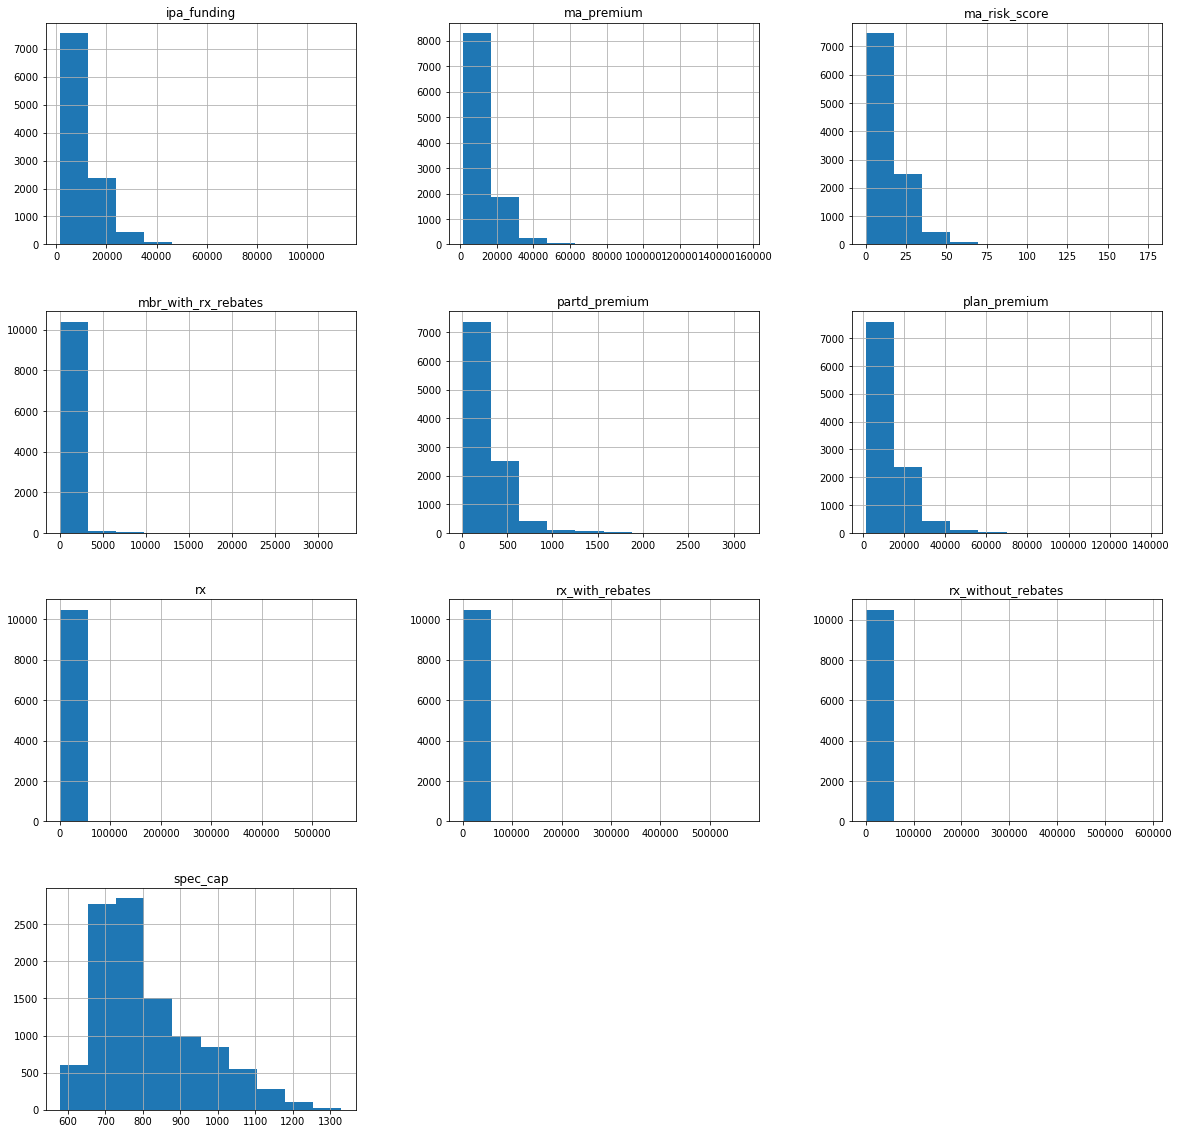

In [28]:
df[col_out].hist(figsize = (20, 20))

### Видим что практически у всех призанков имеется смещение влево. Это говорит о том что в данные внесены экстремально большие значения. Один признак из этого правила выбивается - "spec_cap", у него распределение больше похоже на пуассоновское и кол-о выбросов на порядок меньше чем у остальных. Посмотрим на boxplot

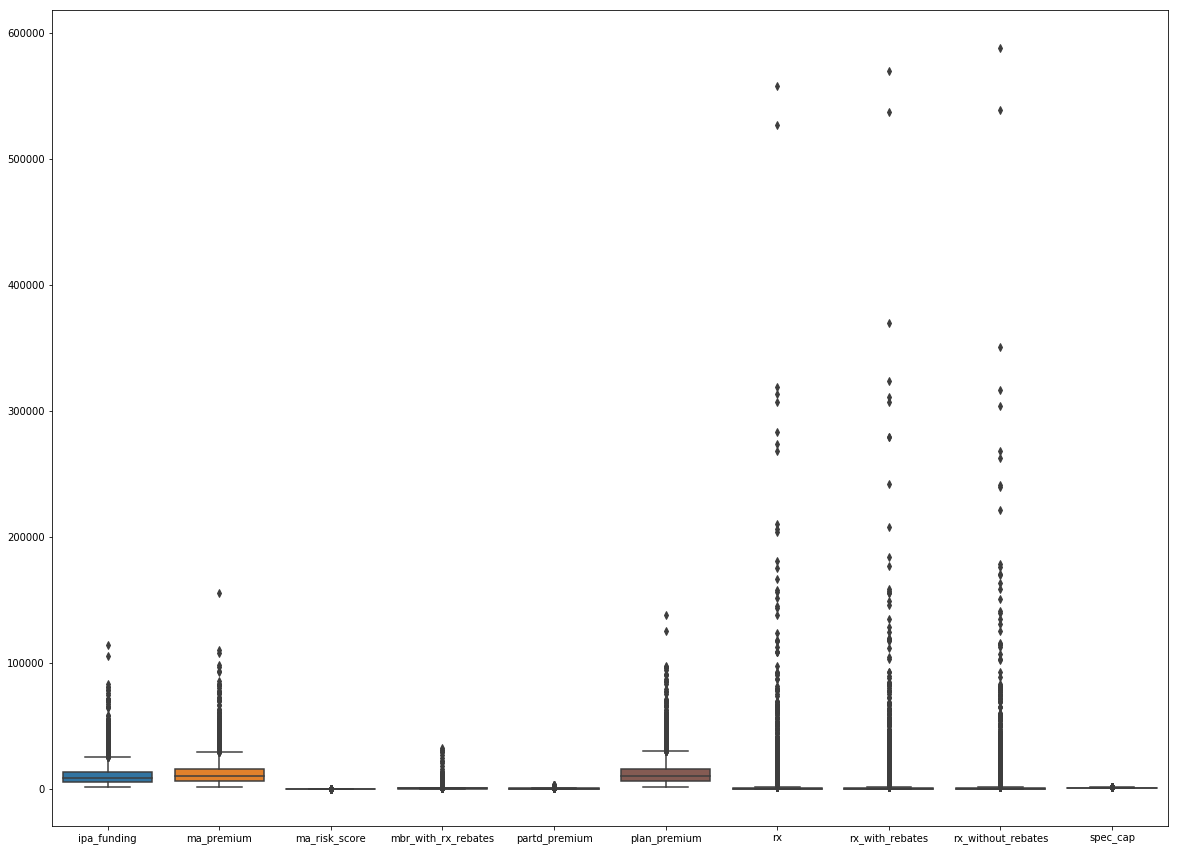

In [29]:
plt.figure(figsize = (20, 15))
sns.boxplot(data = df[col_out])

### Видим что для 4х признаков масштаб не подходит. Эти 4 признака расмотрим отдельно от всех ("ma_risk_score", "mbr_with_rx_rebates", "partd_premium", "spec_cap"). И оставшиеся так же посмотрим без этих 4х

In [30]:
col_out_min = ['ma_risk_score', 'mbr_with_rx_rebates', 'partd_premium', 'spec_cap']

In [31]:
col_out_max = [col.replace('outliers_', '') for col in columns_outliers if not(col.replace('outliers_', '') in col_out_min) ]

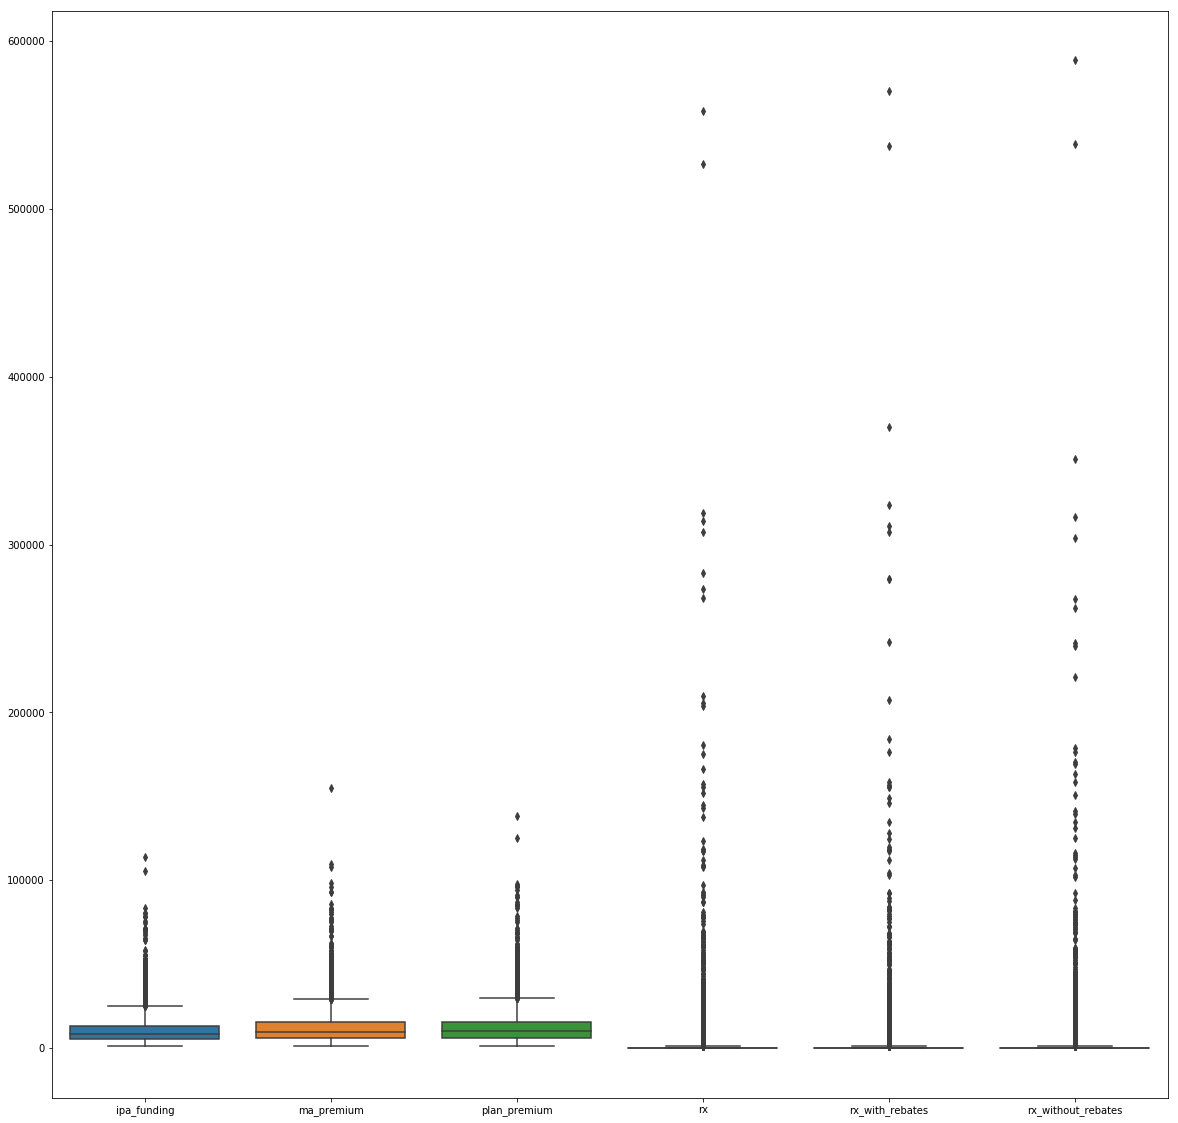

In [32]:
plt.figure(figsize = (20, 20))
sns.boxplot(data= df[col_out_max])

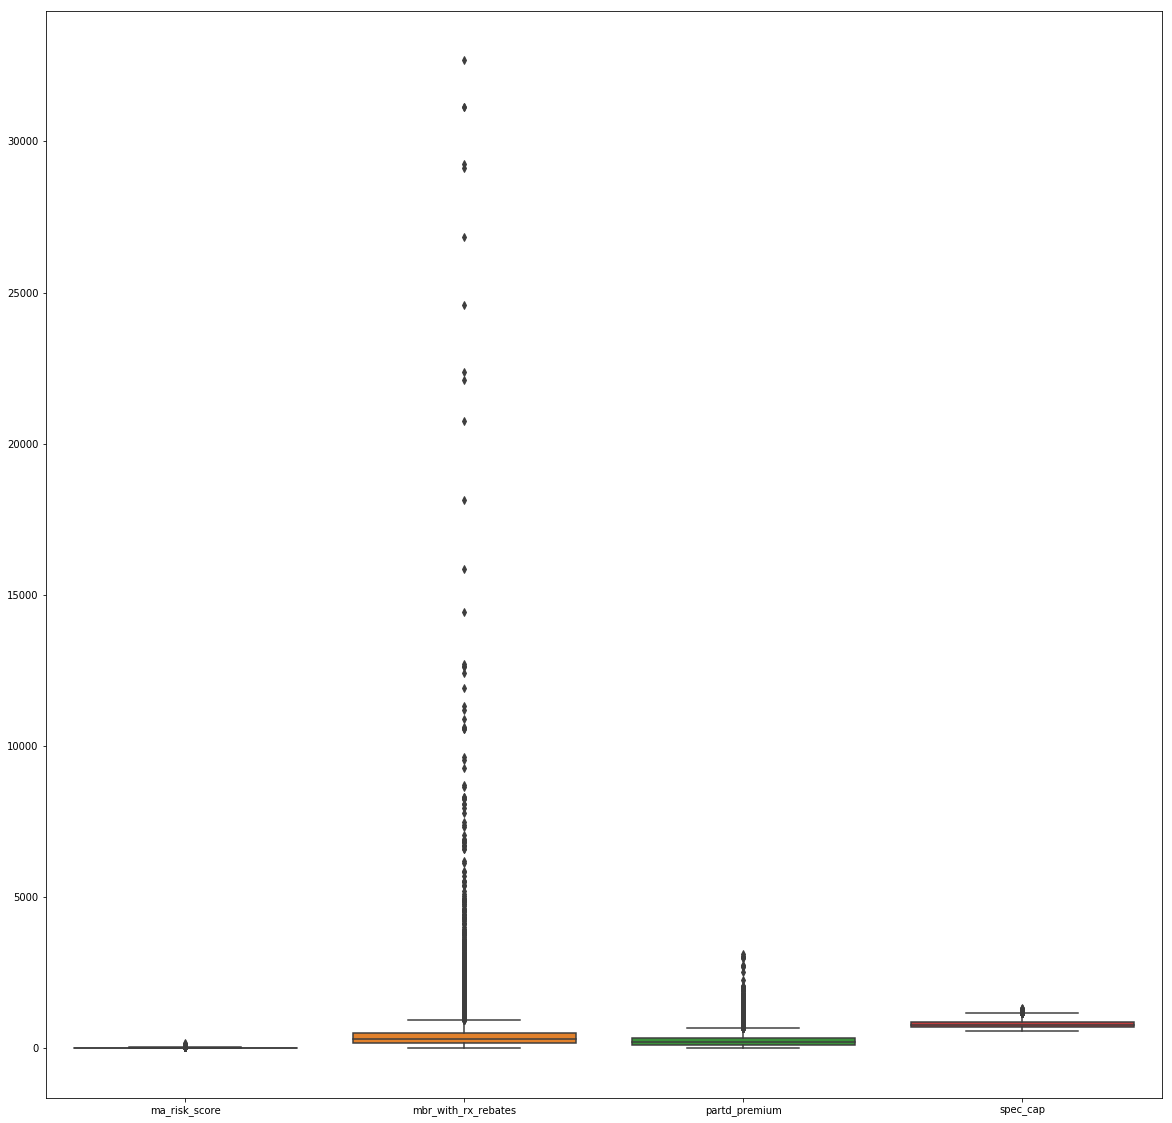

In [33]:
plt.figure(figsize = (20, 20))
sns.boxplot(data = df[col_out_min])

### Признак "mbr_with_rx_rebates" так же на boxplot расмотрим отдельно. А оставшиея 3 так же отдельно

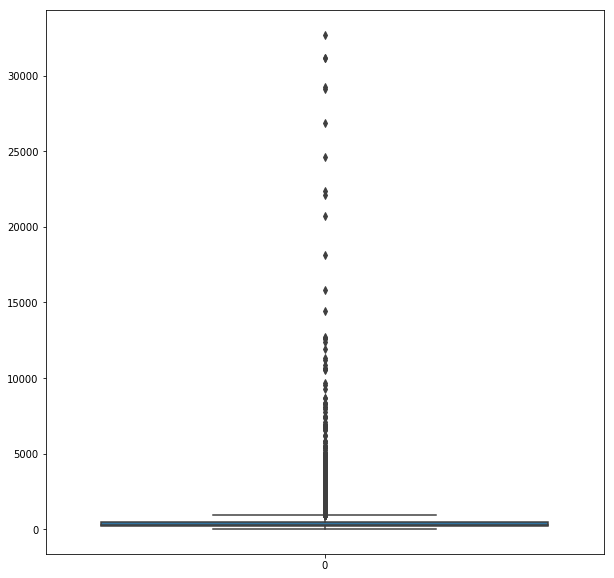

In [34]:
col_out_min.remove('mbr_with_rx_rebates')
plt.figure(figsize = (10, 10))
sns.boxplot(data = df['mbr_with_rx_rebates'])

In [35]:
df['mbr_with_rx_rebates'].describe()

count    10530.000000
mean       500.425354
std       1130.533796
min         13.940000
25%        197.210000
50%        312.365000
75%        499.352500
max      32687.500000
Name: mbr_with_rx_rebates, dtype: float64

In [36]:
print('percent outliers in mbr_with_rx_rebates = {:.2f}'.format(df.outliers_mbr_with_rx_rebates.sum() / df.shape[0] * 100))

percent outliers in mbr_with_rx_rebates = 0.90


### Видим что по данному признаку "mbr_with_rx_rebates" очень большой дисбаланс 

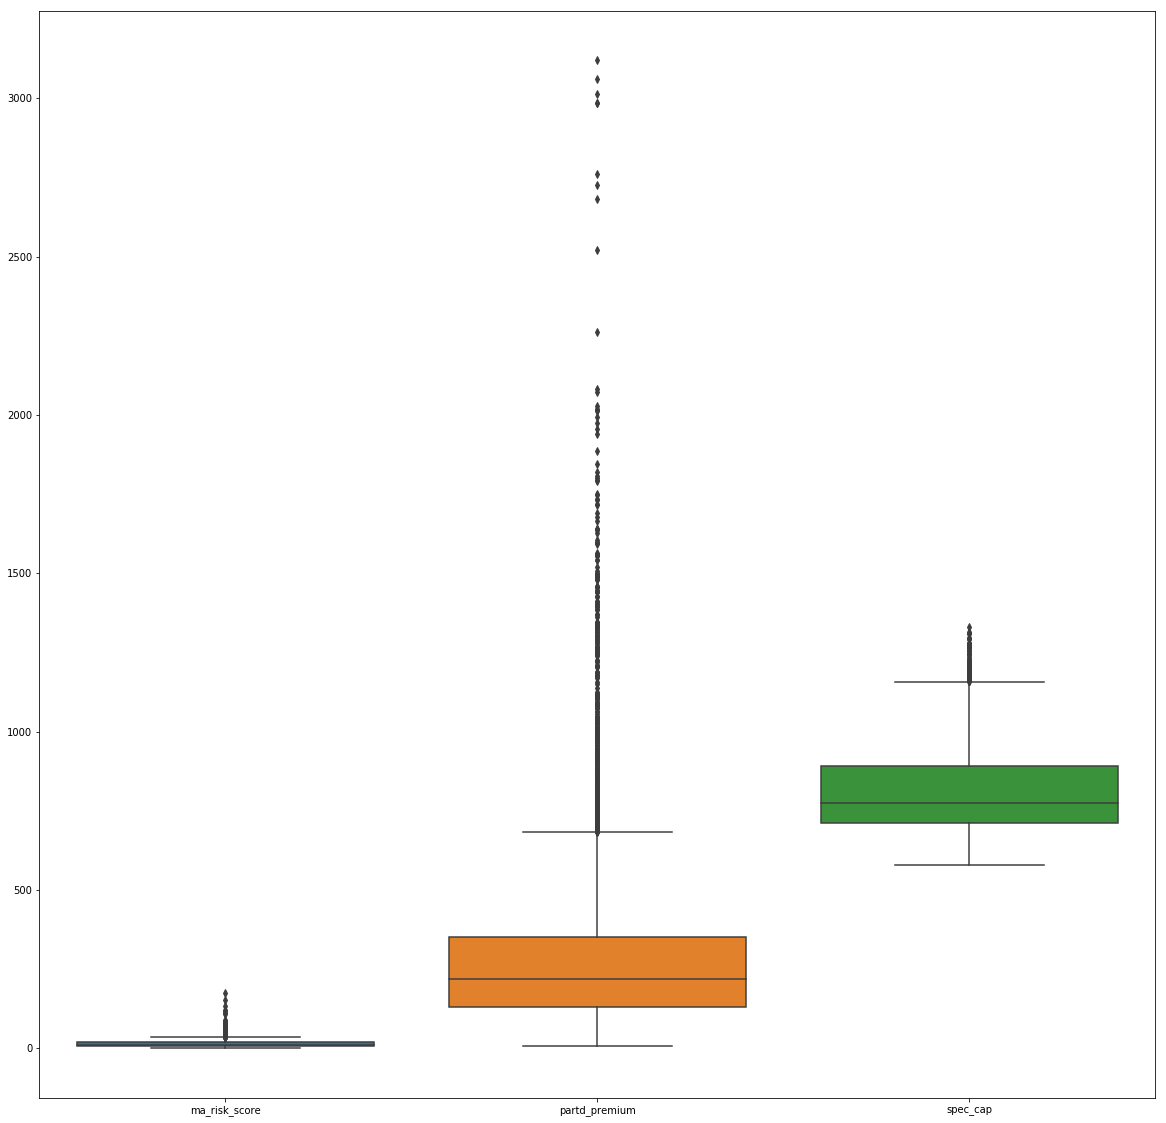

In [37]:
plt.figure(figsize = (20, 20))
sns.boxplot(data = df[col_out_min])

In [38]:
col_out_min

['ma_risk_score', 'partd_premium', 'spec_cap']

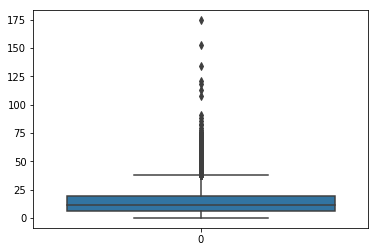

In [39]:
sns.boxplot(data = df['ma_risk_score'])

### 3.2.2 

# Кластеризация. 
### Все выше перечисленные методы были применены к отдельно взятым фичам. Т.е. анализировался признак каждого экземпляра данных в контексте именно даннаго признака. Можно попробовать подойти к данной задаче как к задаче ML - попробовать кластеризовать данные по всему пространству финансовых признаков. Таким образом каждый экземпляр данных будет представлять собой точку в n-мерном пространстве (где n количество фичей). В связи с этим применим последовательно ряд методов кластерицазии

## DBSCAN 

In [40]:
from sklearn.cluster import DBSCAN

In [41]:
outlier_detection = DBSCAN(min_samples = 2, eps = 3) # создаем наш кластеризатор

clusters = outlier_detection.fit_predict(df[col_out]) # проводим кластеризацию на наших фин-х фичах
list(clusters).count(-1)

10530

In [42]:
df.shape[0]

10530

### Видим что данный алгоритм не смог выявить в данном признаковом пространстве отклоений. Таким образом наши данные в этом пространстве плотно сгруппированы. Попробуем другой алгоритм

## IsolationForest 

In [43]:
from sklearn.ensemble import IsolationForest


In [44]:
# создаем кластеризатор
clf = IsolationForest(behaviour= 'new', max_samples= 100, random_state=1, contamination='auto')
# делим наши данные
preds = clf.fit_predict(df[col_out])

In [45]:
(preds == -1).sum() # кол-о аномальных точек

1227

In [46]:
# преобразуем из массива в булев список 
out_IsF = []
for p in preds:
    if p == -1:
        out_IsF.append(True)
    else:
        out_IsF.append(False)

In [47]:
df['outliers_IsF'] = out_IsF # создаем отедльный признак, который говорит о пренадлежности экземпляра данных к выбросам

In [48]:
df.head()

,ipa_funding,ma_premium,ma_risk_score,mbr_with_rx_rebates,partd_premium,pcp_cap,plan_premium,reinsurance,rx,rx_with_rebates,...,outliers_mbr_with_rx_rebates,outliers_partd_premium,outliers_pcp_cap,outliers_plan_premium,outliers_reinsurance,outliers_rx,outliers_rx_with_rebates,outliers_rx_without_rebates,outliers_spec_cap,outliers_IsF
0,2721.85,3611.21,2.02,632.13,82.13,474.83,3507.00,7.92,0.00,0.00,...,False,False,False,False,False,False,False,False,False,False
1,5060.21,6817.97,5.24,2535.98,205.93,457.04,6204.84,8.13,11289.69,10688.46,...,False,False,False,False,False,False,False,False,False,True
2,3159.82,3443.32,3.17,595.96,59.13,482.63,4012.46,7.92,0.00,0.00,...,False,False,False,False,False,False,False,False,False,False
3,9563.23,11015.31,9.92,181.95,265.65,469.04,9770.61,8.30,73.88,62.87,...,False,False,False,False,False,False,False,False,False,False
4,17456.26,17590.58,25.55,810.83,210.62,527.98,19976.13,8.90,522.48,517.56,...,False,False,False,False,False,False,False,False,False,False
